<a href="https://colab.research.google.com/github/mabuice/AMATH_Visual_Coding/blob/main/Homework_Decoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="background: #F0FAFF; border-radius: 3px; padding: 10px;">
<h3> This notebook will explore decoding using the Allen Brain Observatory data </h3>
    
In this notebook, we'll look at decoding using different models, different definitions of the design matrix, and different neural populations.


In [22]:
# @title Run to initialize Allen Brain Observatory on Colab {display-mode: "form" }
# run only once per runtime/session, and only if running in colab
# the runtime will need to restart after
%%capture
!apt install s3fs
!pip install allensdk
!mkdir -p /data/allen-brain-observatory/
!s3fs allen-brain-observatory /data/allen-brain-observatory/ -o public_bucket=1

### Standard imports

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn

### Allen Brain Observatory set up

In [24]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

manifest_file = '../data/allen-brain-observatory/visual-coding-2p/manifest.json'
boc = BrainObservatoryCache(manifest_file=manifest_file)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
The command below returns a list of dictionaries containing information about the experiment sessions.  As we saw in the main notebook, you can use optional arguments to specify subsets of experiment sessions.  (Hint:  use the help function to see other ways of choosing sessions.)
</div>

In [25]:
exps = boc.get_ophys_experiments()

In [26]:
pd.DataFrame(exps)

,id,imaging_depth,targeted_structure,cre_line,reporter_line,acquisition_age_days,experiment_container_id,session_type,donor_name,specimen_name,fail_eye_tracking
0,566752133,175,VISl,Emx1-IRES-Cre,Ai93(TITL-GCaMP6f),116,564425775,three_session_C2,283147,Emx1-IRES-Cre;Camk2a-tTA;Ai93-283147,True
1,653123586,275,VISl,Rorb-IRES2-Cre,Ai93(TITL-GCaMP6f),111,653123584,three_session_C2,352471,Rorb-IRES2-Cre;Camk2a-tTA;Ai93-352471,True
2,577225417,275,VISl,Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),105,575772104,three_session_C2,296710,Vip-IRES-Cre;Ai148-296710,False
3,556353209,375,VISam,Rbp4-Cre_KL100,Ai93(TITL-GCaMP6f),101,555327033,three_session_A,271750,Rbp4-Cre;Camk2a-tTA;Ai93-271750,True
4,510390912,275,VISal,Rorb-IRES2-Cre,Ai93(TITL-GCaMP6f),80,511500480,three_session_A,232623,Rorb-IRES2-Cre;Camk2a-tTA;Ai93-232623,False
...,...,...,...,...,...,...,...,...,...,...,...
1363,577820172,275,VISam,Rorb-IRES2-Cre,Ai93(TITL-GCaMP6f),110,576411244,three_session_B,295995,Rorb-IRES2-Cre;Camk2a-tTA;Ai93-295995,False
1364,648389302,275,VISp,Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),108,647155120,three_session_B,347751,Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93-347751,False
1365,510517609,375,VISpm,Rbp4-Cre_KL100,Ai93(TITL-GCaMP6f),75,511511006,three_session_B,233442,Rbp4-Cre;Camk2a-tTA;Ai93-233442,False
1366,547560448,350,VISal,Nr5a1-Cre,Ai93(TITL-GCaMP6f),107,546328009,three_session_C2,261969,Nr5a1-Cre;Camk2a-tTA;Ai93-261969,False


The following function will grab the data_set object for a given session_id.  The last two lines will extract the dF/F traces and the stimulus table for a given stimulus type.  

Some other stimulus types are `natural_scenes` and `static_gratings`.

In [27]:
session_id = 627823695
data_set = boc.get_ophys_experiment_data(session_id)

timestamps, dff = data_set.get_dff_traces()
stim_table = data_set.get_stimulus_table('drifting_gratings')

In [28]:
print(dff.shape)


(21, 115474)


**Exercise 1:** Use a different decoder and repeat the same analysis.  Good decoders to try are Logistic Regression, Support Vector Machine, K-Means.

Logistic Regression:
https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html

Support Vector Machine:
https://scikit-learn.org/1.6/modules/generated/sklearn.svm.SVC.html

(Note:  look through the documentation to see what parameters govern these decoders.  How should you set them?  What effect do they have on the performance of your classifier?)


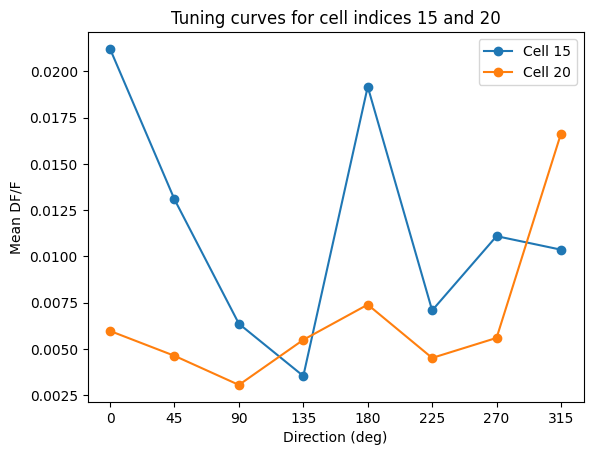

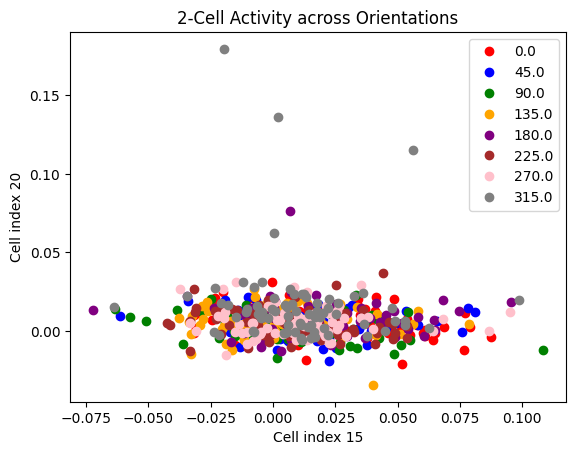

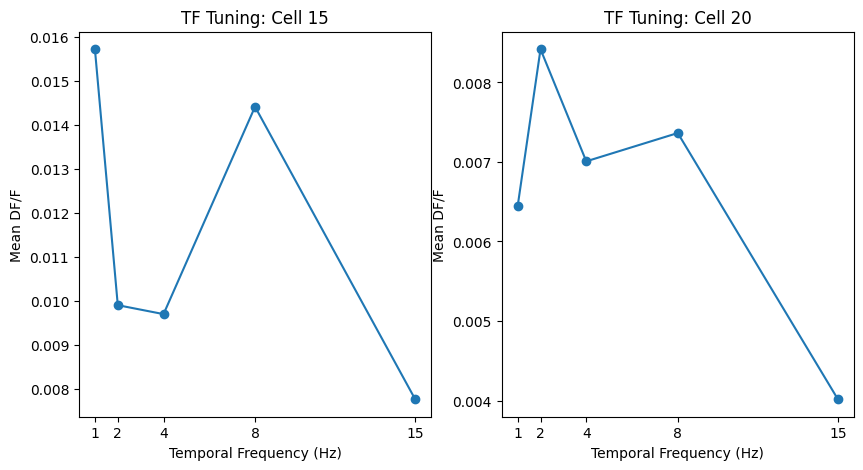

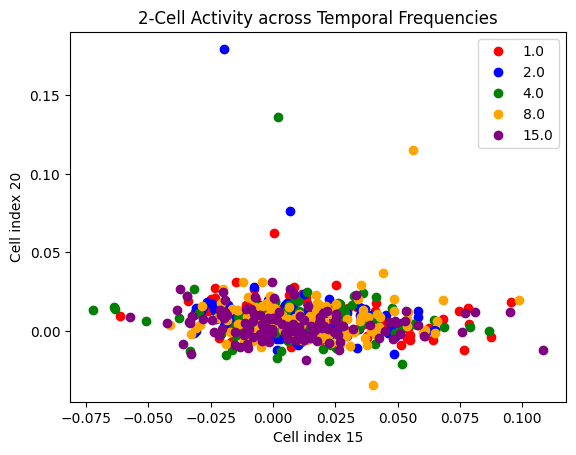

In [31]:
#PREP
# defining missing parameters
num_neurons = dff.shape[0]            # number of neurons
num_trials = stim_table.shape[0]        # number of stimulus trials
cell_index = 15                        # randomly chose this cell
cell_index2 = 20                       # randomly chose this cell

# color list for plitting
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']


# building stim arrays
activity = np.zeros([num_trials, num_neurons])
stim = []

for i, row in stim_table.iterrows():
    # get the mean dF/F for each neuron in the stim trial
    activity[i] = dff[:, int(row.start):int(row.end)].mean(axis=1)
    if np.isfinite(row.orientation):
        stim.append(str(row.orientation))
    else:
        stim.append('blank')

stim = np.array(stim)

# buildiing orientation tuning curves
orientations = np.sort(stim_table.orientation.unique())
orientation_labels = [str(ori) for ori in orientations[:-1]] + ['blank']
num_orientations = len(orientations)
tuning_curves = np.zeros([num_neurons, num_orientations-1])

for i, ori in enumerate(orientations[:-1]):  # leave out nans
    mask = stim == str(ori)
    tuning_curves[:, i] = activity[mask, :].mean(axis=0)

# building temporal frequency tuning curves
tf_stim = []
for i, row in stim_table.iterrows():
    if np.isfinite(row.temporal_frequency):
        tf_stim.append(str(row.temporal_frequency))
    else:
        tf_stim.append('blank')

tf_stim = np.array(tf_stim)

temporal_frequencies = np.sort(stim_table.temporal_frequency.unique())
tf_labels = [str(tf) for tf in temporal_frequencies[:-1]] + ['blank']
num_tfs = len(temporal_frequencies)
tf_tuning_curves = np.zeros([num_neurons, num_tfs-1])

for i, tf in enumerate(temporal_frequencies[:-1]):
    mask = tf_stim == str(tf)
    tf_tuning_curves[:, i] = activity[mask, :].mean(axis=0)

# plotting tuning curves
plt.figure()
plt.plot(orientations[:-1], tuning_curves[cell_index], 'o-', label=f"Cell {cell_index}")
plt.plot(orientations[:-1], tuning_curves[cell_index2], 'o-', label=f"Cell {cell_index2}")
plt.xlabel("Direction (deg)")
plt.ylabel("Mean DF/F")
plt.xticks(orientations[:-1])
plt.title("Tuning curves for cell indices " + str(cell_index) + " and " + str(cell_index2))
plt.legend()
plt.show()

# plotting 2-cell activity across orientations
two_neuron_activity = activity[:, [cell_index, cell_index2]]

for i, ori in enumerate(orientations[:-1]):
    mask = stim == str(ori)
    plt.plot(two_neuron_activity[mask, 0], two_neuron_activity[mask, 1],
             'o', color=colors[i], label=ori)
    plt.legend()
plt.xlabel('Cell index ' + str(cell_index))
plt.ylabel('Cell index ' + str(cell_index2))
plt.title("2-Cell Activity across Orientations")
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(temporal_frequencies[:-1], tf_tuning_curves[cell_index], 'o-')
ax[0].set_xlabel("Temporal Frequency (Hz)")
ax[0].set_ylabel("Mean DF/F")
ax[0].set_xticks(temporal_frequencies[:-1])
ax[0].set_title("TF Tuning: Cell " + str(cell_index))

ax[1].plot(temporal_frequencies[:-1], tf_tuning_curves[cell_index2], 'o-')
ax[1].set_xlabel("Temporal Frequency (Hz)")
ax[1].set_ylabel("Mean DF/F")
ax[1].set_xticks(temporal_frequencies[:-1])
ax[1].set_title("TF Tuning: Cell " + str(cell_index2))
plt.show()

for i, tf in enumerate(temporal_frequencies[:-1]):
    mask = tf_stim == str(tf)
    plt.plot(two_neuron_activity[mask, 0], two_neuron_activity[mask, 1],
             'o', color=colors[i], label=tf)
    plt.legend()
plt.xlabel('Cell index ' + str(cell_index))
plt.ylabel('Cell index ' + str(cell_index2))
plt.title("2-Cell Activity across Temporal Frequencies")
plt.show()

Training set shapes: (471, 2) (471,)
Test set shapes: (157, 2) (157,)
Percentage correct on training set:   0.14437367303609341
Percentage correct on testing set:    0.10191082802547771
TF - Percentage correct on training set:   0.20169851380042464
TF - Percentage correct on testing set:    0.1592356687898089


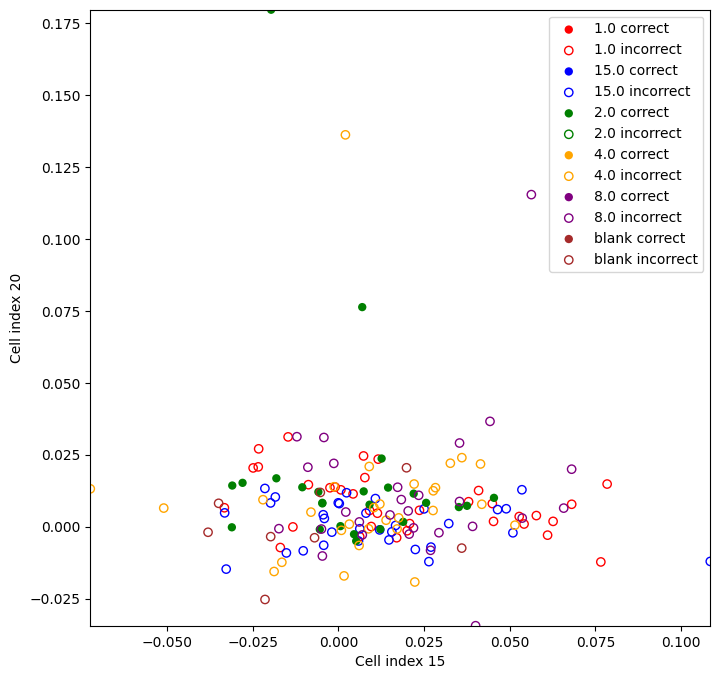

<Axes: xlabel='Cell index 15', ylabel='Cell index 20'>

In [23]:
# -----------------------------
# NOW USING LOGISTICAL REGRESSION
# -----------------------------
from sklearn.linear_model import LogisticRegression

# splitting the data into training and test sets
# using 75% for training
test_index = int(0.75 * num_trials)
two_neuron_activity_train = two_neuron_activity[:test_index]
two_neuron_activity_test = two_neuron_activity[test_index:]
stim_train = stim[:test_index]
stim_test = stim[test_index:]

print("Training set shapes:", two_neuron_activity_train.shape, stim_train.shape)
print("Test set shapes:", two_neuron_activity_test.shape, stim_test.shape)

# create and train the classifier
classifier = LogisticRegression(max_iter=1000)
classifier.fit(two_neuron_activity_train, stim_train)

# predictions for the training and testing sets
stim_train_hat2 = classifier.predict(two_neuron_activity_train)
stim_test_hat2 = classifier.predict(two_neuron_activity_test)

# error (1 - percentage correct)
print("Percentage correct on training set:  ", np.mean(stim_train_hat2 == stim_train))
print("Percentage correct on testing set:   ", np.mean(stim_test_hat2 == stim_test))

# temporal frequency classification
tf_stim_train = tf_stim[:test_index]
tf_stim_test = tf_stim[test_index:]

tf_classifier = LogisticRegression(max_iter=1000)
tf_classifier.fit(two_neuron_activity_train, tf_stim_train)

tf_stim_train_hat2 = tf_classifier.predict(two_neuron_activity_train)
tf_stim_test_hat2 = tf_classifier.predict(two_neuron_activity_test)

print("TF - Percentage correct on training set:  ", np.mean(tf_stim_train_hat2 == tf_stim_train))
print("TF - Percentage correct on testing set:   ", np.mean(tf_stim_test_hat2 == tf_stim_test))


def plot_test_performance(X, y, y_hat, xlabel=None, ylabel=None, names=None, ax=None):
    classes = np.unique(y)
    num_classes = len(classes)

    if ax is None:
        ax = plt.figure(figsize=(8, 8)).gca()

    for ii, cl in enumerate(classes):
        if names is not None:
            this_label = names[ii]
        else:
            this_label = f'{cl}'

        # determining correct vs. incorrect predictions
        is_class = (y == cl)
        is_correct = (y == y_hat)

        ax.scatter(X[is_class & is_correct, 0],
                   X[is_class & is_correct, 1],
                   c=colors[ii],
                   edgecolor='none',
                   label=this_label + ' correct')
        ax.scatter(X[is_class & ~is_correct, 0],
                   X[is_class & ~is_correct, 1],
                   c='none',
                   edgecolor=colors[ii],
                   label=this_label + ' incorrect')

    ax.set_xlim(X[:, 0].min(), X[:, 0].max())
    ax.set_ylim(X[:, 1].min(), X[:, 1].max())
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.show()
    return ax

# plot performance for temporal frequency classification
plot_test_performance(two_neuron_activity_test, tf_stim_test, tf_stim_test_hat2,
                      xlabel='Cell index ' + str(cell_index),
                      ylabel='Cell index ' + str(cell_index2))

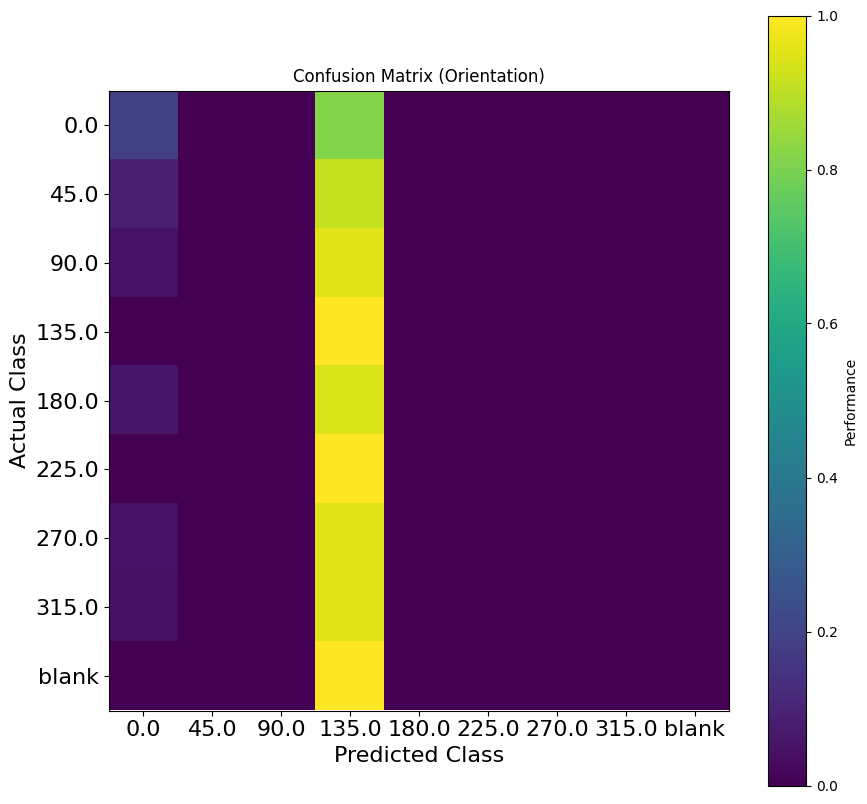

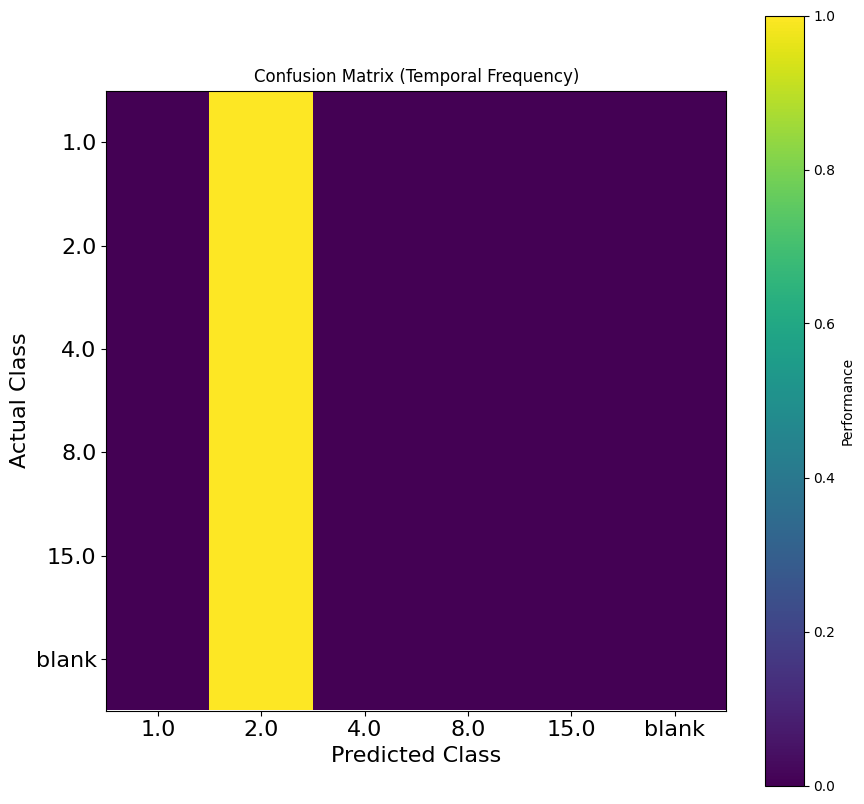

Weights shape: (9, 2)


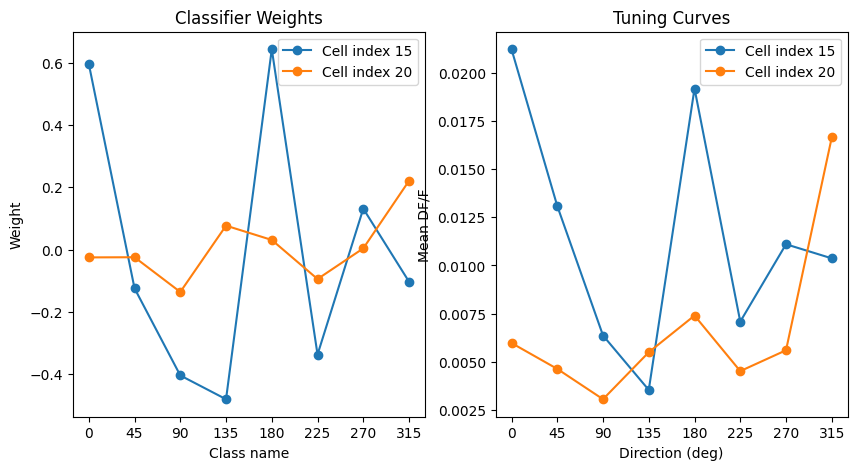

In [24]:
# -----------------------------
# CONFUSION MATRIX
# -----------------------------
from sklearn.metrics import confusion_matrix

# orientation classification
C = confusion_matrix(stim_test, stim_test_hat2, normalize='true', labels=orientation_labels)
num_classes = len(orientation_labels)

plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
cax = ax.imshow(C, interpolation='none', vmin=0, vmax=C.max())
ax.set_xlabel('Predicted Class', fontsize=16)
ax.set_ylabel('Actual Class', fontsize=16)
ax.set_xticks(range(num_classes))
ax.set_xticklabels(orientation_labels, fontsize=16)
ax.set_yticks(range(num_classes))
ax.set_yticklabels(orientation_labels, fontsize=16)
cbar = plt.colorbar(cax)
cbar.set_label('Performance')
plt.title("Confusion Matrix (Orientation)")
plt.show()

# temporal frequency classification
C = confusion_matrix(tf_stim_test, tf_stim_test_hat2, normalize='true', labels=tf_labels)
num_classes = len(tf_labels)

plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
cax = ax.imshow(C, interpolation='none', vmin=0, vmax=C.max())
ax.set_xlabel('Predicted Class', fontsize=16)
ax.set_ylabel('Actual Class', fontsize=16)
ax.set_xticks(range(num_classes))
ax.set_xticklabels(tf_labels, fontsize=16)
ax.set_yticks(range(num_classes))
ax.set_yticklabels(tf_labels, fontsize=16)
cbar = plt.colorbar(cax)
cbar.set_label('Performance')
plt.title("Confusion Matrix (Temporal Frequency)")
plt.show()

# plotting classifier weights vs. tuning curves
weights = classifier.coef_
print("Weights shape:", weights.shape)

classes_numeric = np.array([float(c) if c != 'blank' else np.nan for c in classifier.classes_])
class_index = np.argsort(classes_numeric)
classes_sorted = classes_numeric[class_index]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(classes_sorted[:-1], weights[class_index[:-1], 0], 'o-', label='Cell index ' + str(cell_index))
ax[0].plot(classes_sorted[:-1], weights[class_index[:-1], 1], 'o-', label='Cell index ' + str(cell_index2))
ax[0].set_xticks(classes_sorted[:-1])
ax[0].legend()
ax[0].set_ylabel('Weight')
ax[0].set_xlabel('Class name')
ax[0].set_title('Classifier Weights')

ax[1].plot(orientations[:-1], tuning_curves[cell_index], 'o-', label='Cell index ' + str(cell_index))
ax[1].plot(orientations[:-1], tuning_curves[cell_index2], 'o-', label='Cell index ' + str(cell_index2))
ax[1].legend()
ax[1].set_xlabel("Direction (deg)")
ax[1].set_ylabel("Mean DF/F")
ax[1].set_xticks(orientations[:-1])
ax[1].set_title('Tuning Curves')
plt.show()

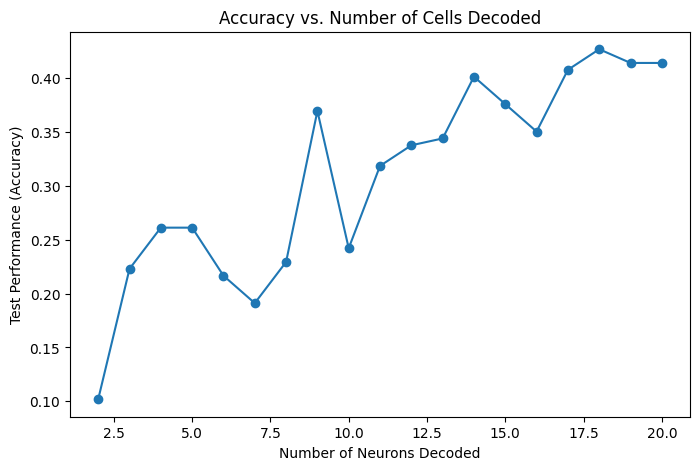

In [27]:
# -----------------------------
# ACCURACY VS. NUMBER OF CELLS DECODED PLOT
# -----------------------------
from sklearn.linear_model import LogisticRegression

# array for storing performance values for different numbers of neurons
performance = np.zeros(num_neurons - 2)

test_index = int(0.75 * num_trials)
stim_train_n = stim[:test_index]
stim_test_n = stim[test_index:]

for n in range(2, num_neurons):
    neuron_indices = np.random.permutation(np.arange(num_neurons))[:n]

    activity_train_n = activity[:test_index, neuron_indices]
    activity_test_n = activity[test_index:, neuron_indices]

    # create and train Logistic Regression classifier
    n_classifier = LogisticRegression(max_iter=1000)
    n_classifier.fit(activity_train_n, stim_train_n)

    # predict on the test set and compute  accuracy
    stim_test_hat_n = n_classifier.predict(activity_test_n)
    performance[n - 2] = np.mean(stim_test_hat_n == stim_test_n)

# plot the accuracy vs. number of neurons decoded
plt.figure(figsize=(8, 5))
plt.plot(np.arange(2, num_neurons), performance, marker='o')
plt.xlabel('Number of Neurons Decoded')
plt.ylabel('Test Performance (Accuracy)')
plt.title('Accuracy vs. Number of Cells Decoded')
plt.show()


# Observations
From the confusion matrices I generated for orientation and temporal frequency, there is one dominating predicting class, as they all line up consistently at one. It seems that the classifier is heavily biased toward predicting that one class and choosing the same label. It's not effectively distinguishing between different stimulus classes. A good classifier is expected to be bright across the diagonal instead of like this vertical line.

Meanwhile, the accuracy vs. number of neurons decoded plot shows a *general* increase in accurate as the number of neurons decoded increases. However, there are too many fluctuations in accuracy to truly be able to say there is a direct relationship. Decoding neurons might not always be better. On the other hand, this is only a small sample of neurons decoded (in class, our graph had up to 300).

It's also interesting to note that both orientation classification and temporal frequency classification showed low accuracy between around 10-20% (meaning high error). Analyzing only 2 neurons may not provide enough information.



---



**Exercise 2:** Use a different stimulus type.  In addition to ‘drifting_gratings’, there are also ‘natural_scenes’ and ‘static_gratings’.  Find a session with these stimuli and try decoding the stimulus condition.

(Hint:  use the function given above to get a list of experiments and convert it to a dataframe).*italicized text*
</div>

In [33]:
# Get the experiment table as a DataFrame
exp_df = pd.DataFrame(boc.get_ophys_experiments())

# Filter experiments to find those with 'three_session_B' in the 'session_type' column
static_gratings_experiments = exp_df[exp_df['session_type'] == 'three_session_B']

# If experiments with 'three_session_B' (static_gratings) are found:
if not static_gratings_experiments.empty:
    # Get the session ID of the first experiment
    session_id = static_gratings_experiments.iloc[0]['id']  # Assuming 'id' column contains session IDs
    print(f"Found session with 'static_gratings' (session_type: three_session_B): {session_id}")
else:
    print("No sessions found with 'static_gratings' (session_type: three_session_B).")

Found session with 'static_gratings' (session_type: three_session_B): 645474010


In [34]:
session_id = 645474010
data_set = boc.get_ophys_experiment_data(session_id)

timestamps, dff = data_set.get_dff_traces()
stim_table = data_set.get_stimulus_table('static_gratings')

print(dff.shape)

(25, 117484)


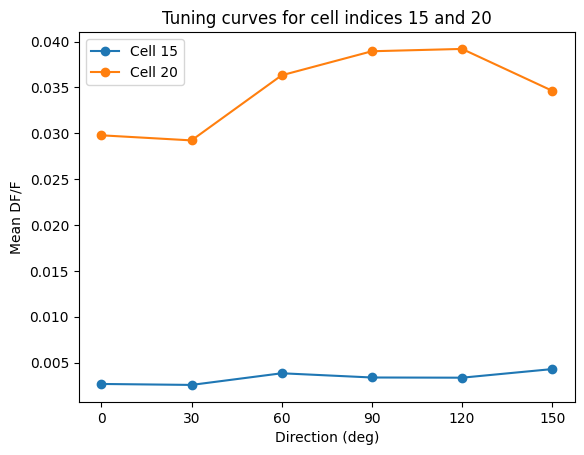

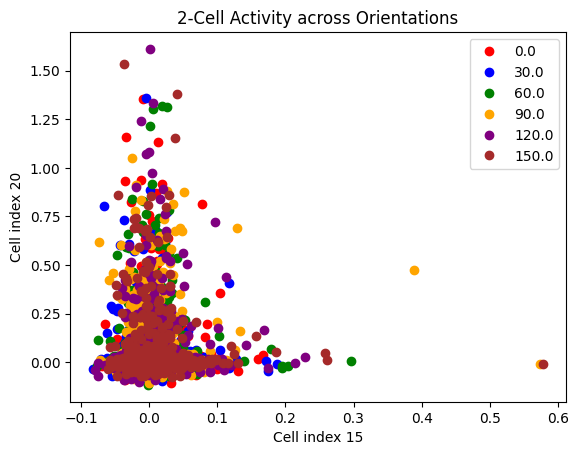

In [38]:
#PREP
# defining missing parameters
num_neurons = dff.shape[0]            # number of neurons
num_trials = stim_table.shape[0]        # number of stimulus trials
cell_index = 15                        # randomly chose this cell
cell_index2 = 20                       # randomly chose this cell

# color list for plitting
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']


# building stim arrays
activity = np.zeros([num_trials, num_neurons])
stim = []

for i, row in stim_table.iterrows():
    # get the mean dF/F for each neuron in the stim trial
    activity[i] = dff[:, int(row.start):int(row.end)].mean(axis=1)
    if np.isfinite(row.orientation):
        stim.append(str(row.orientation))
    else:
        stim.append('blank')

stim = np.array(stim)

# buildiing orientation tuning curves
orientations = np.sort(stim_table.orientation.unique())
orientation_labels = [str(ori) for ori in orientations[:-1]] + ['blank']
num_orientations = len(orientations)
tuning_curves = np.zeros([num_neurons, num_orientations-1])

for i, ori in enumerate(orientations[:-1]):  # leave out nans
    mask = stim == str(ori)
    tuning_curves[:, i] = activity[mask, :].mean(axis=0)

# plotting tuning curves
plt.figure()
plt.plot(orientations[:-1], tuning_curves[cell_index], 'o-', label=f"Cell {cell_index}")
plt.plot(orientations[:-1], tuning_curves[cell_index2], 'o-', label=f"Cell {cell_index2}")
plt.xlabel("Direction (deg)")
plt.ylabel("Mean DF/F")
plt.xticks(orientations[:-1])
plt.title("Tuning curves for cell indices " + str(cell_index) + " and " + str(cell_index2))
plt.legend()
plt.show()

# plotting 2-cell activity across orientations
two_neuron_activity = activity[:, [cell_index, cell_index2]]

for i, ori in enumerate(orientations[:-1]):
    mask = stim == str(ori)
    plt.plot(two_neuron_activity[mask, 0], two_neuron_activity[mask, 1],
             'o', color=colors[i], label=ori)
    plt.legend()
plt.xlabel('Cell index ' + str(cell_index))
plt.ylabel('Cell index ' + str(cell_index2))
plt.title("2-Cell Activity across Orientations")
plt.show()

# temporal frequency does not show for static_gratings stimulus type
# static means unchanging patterns, so no concept of a frequency of movement

Training set shapes: (4500, 2) (4500,)
Test set shapes: (1500, 2) (1500,)
Percentage correct on training set:   0.16177777777777777
Percentage correct on testing set:    0.16533333333333333


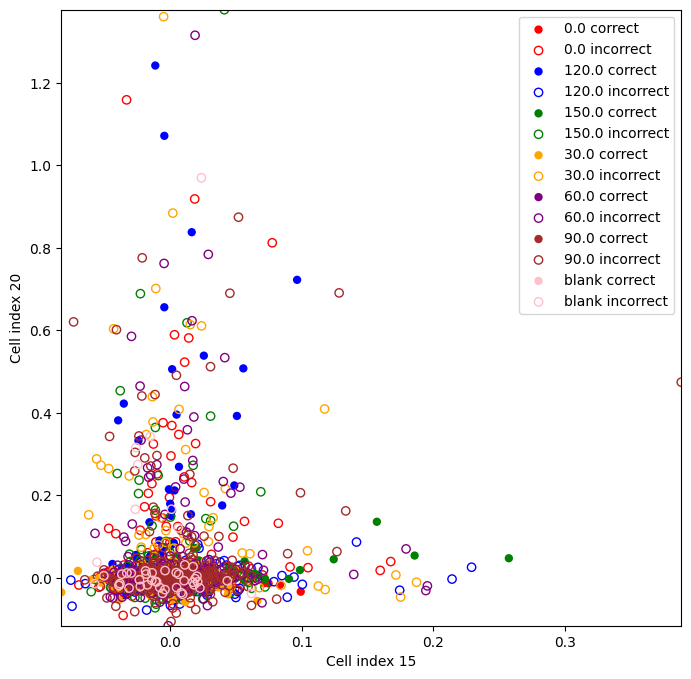

<Axes: xlabel='Cell index 15', ylabel='Cell index 20'>

In [42]:
# -----------------------------
# NOW USING LOGISTICAL REGRESSION
# -----------------------------
from sklearn.linear_model import LogisticRegression

# splitting the data into training and test sets
# using 75% for training
test_index = int(0.75 * num_trials)
two_neuron_activity_train = two_neuron_activity[:test_index]
two_neuron_activity_test = two_neuron_activity[test_index:]
stim_train = stim[:test_index]
stim_test = stim[test_index:]

print("Training set shapes:", two_neuron_activity_train.shape, stim_train.shape)
print("Test set shapes:", two_neuron_activity_test.shape, stim_test.shape)

# Create and train the classifier
classifier = LogisticRegression(max_iter=1000)
classifier.fit(two_neuron_activity_train, stim_train)  # Use orientation labels

# predictions for the training and testing sets
stim_train_hat2 = classifier.predict(two_neuron_activity_train)
stim_test_hat2 = classifier.predict(two_neuron_activity_test)

# error (1 - percentage correct)
print("Percentage correct on training set:  ", np.mean(stim_train_hat2 == stim_train))
print("Percentage correct on testing set:   ", np.mean(stim_test_hat2 == stim_test))

def plot_test_performance(X, y, y_hat, xlabel=None, ylabel=None, names=None, ax=None):
    classes = np.unique(y)
    num_classes = len(classes)

    if ax is None:
        ax = plt.figure(figsize=(8, 8)).gca()

    for ii, cl in enumerate(classes):
        if names is not None:
            this_label = names[ii]
        else:
            this_label = f'{cl}'

        # determining correct vs. incorrect predictions
        is_class = (y == cl)
        is_correct = (y == y_hat)

        ax.scatter(X[is_class & is_correct, 0],
                   X[is_class & is_correct, 1],
                   c=colors[ii],
                   edgecolor='none',
                   label=this_label + ' correct')
        ax.scatter(X[is_class & ~is_correct, 0],
                   X[is_class & ~is_correct, 1],
                   c='none',
                   edgecolor=colors[ii],
                   label=this_label + ' incorrect')

    ax.set_xlim(X[:, 0].min(), X[:, 0].max())
    ax.set_ylim(X[:, 1].min(), X[:, 1].max())
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.show()
    return ax

# plot performance for temporal frequency classification
plot_test_performance(two_neuron_activity_test, stim_test, stim_test_hat2,
                      xlabel='Cell index ' + str(cell_index),
                      ylabel='Cell index ' + str(cell_index2))

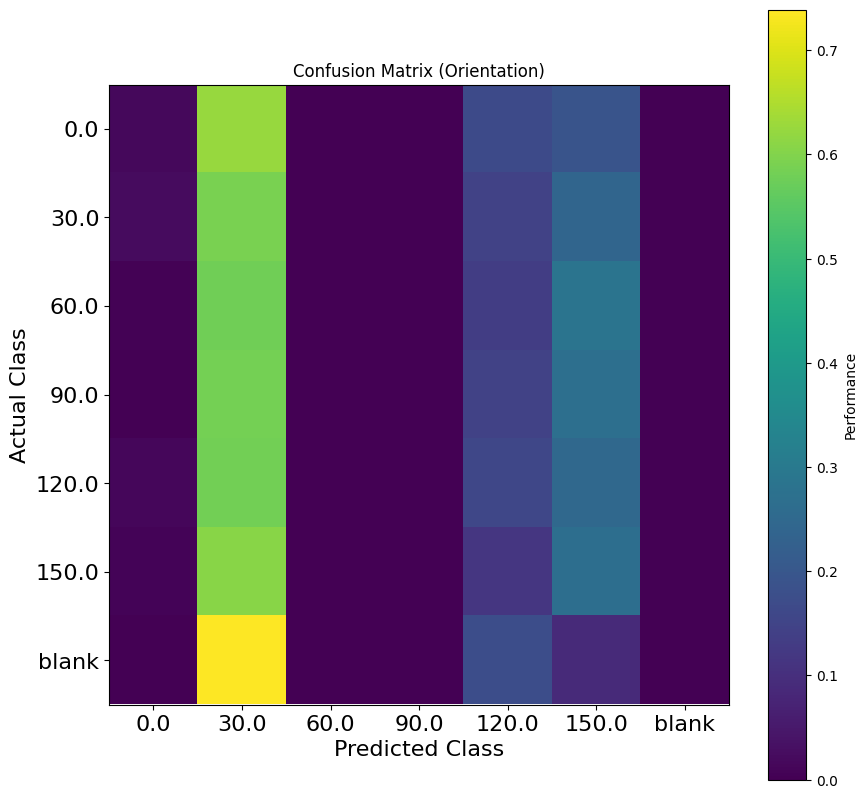

Weights shape: (7, 2)


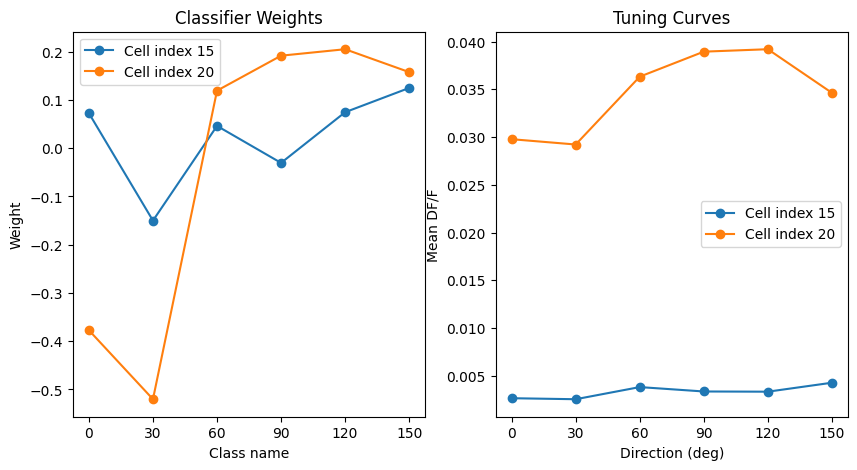

In [43]:
# -----------------------------
# CONFUSION MATRIX
# -----------------------------
from sklearn.metrics import confusion_matrix

# orientation classification
C = confusion_matrix(stim_test, stim_test_hat2, normalize='true', labels=orientation_labels)
num_classes = len(orientation_labels)

plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
cax = ax.imshow(C, interpolation='none', vmin=0, vmax=C.max())
ax.set_xlabel('Predicted Class', fontsize=16)
ax.set_ylabel('Actual Class', fontsize=16)
ax.set_xticks(range(num_classes))
ax.set_xticklabels(orientation_labels, fontsize=16)
ax.set_yticks(range(num_classes))
ax.set_yticklabels(orientation_labels, fontsize=16)
cbar = plt.colorbar(cax)
cbar.set_label('Performance')
plt.title("Confusion Matrix (Orientation)")
plt.show()

# plotting classifier weights vs. tuning curves
weights = classifier.coef_
print("Weights shape:", weights.shape)

classes_numeric = np.array([float(c) if c != 'blank' else np.nan for c in classifier.classes_])
class_index = np.argsort(classes_numeric)
classes_sorted = classes_numeric[class_index]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(classes_sorted[:-1], weights[class_index[:-1], 0], 'o-', label='Cell index ' + str(cell_index))
ax[0].plot(classes_sorted[:-1], weights[class_index[:-1], 1], 'o-', label='Cell index ' + str(cell_index2))
ax[0].set_xticks(classes_sorted[:-1])
ax[0].legend()
ax[0].set_ylabel('Weight')
ax[0].set_xlabel('Class name')
ax[0].set_title('Classifier Weights')

ax[1].plot(orientations[:-1], tuning_curves[cell_index], 'o-', label='Cell index ' + str(cell_index))
ax[1].plot(orientations[:-1], tuning_curves[cell_index2], 'o-', label='Cell index ' + str(cell_index2))
ax[1].legend()
ax[1].set_xlabel("Direction (deg)")
ax[1].set_ylabel("Mean DF/F")
ax[1].set_xticks(orientations[:-1])
ax[1].set_title('Tuning Curves')
plt.show()

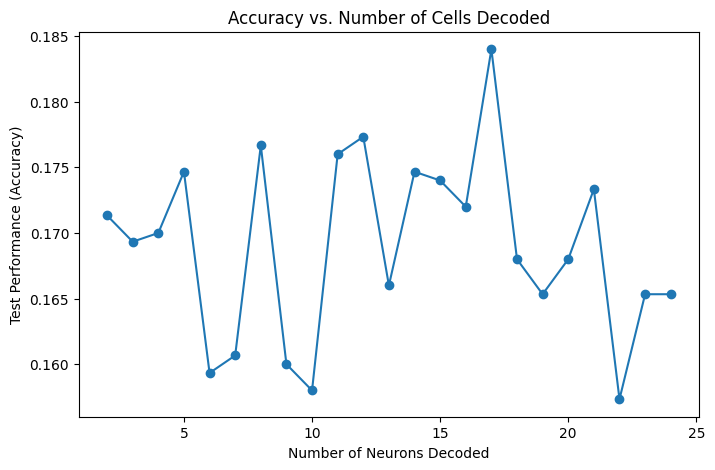

In [44]:
# -----------------------------
# ACCURACY VS. NUMBER OF CELLS DECODED PLOT
# -----------------------------
from sklearn.linear_model import LogisticRegression

# array for storing performance values for different numbers of neurons
performance = np.zeros(num_neurons - 2)

test_index = int(0.75 * num_trials)
stim_train_n = stim[:test_index]
stim_test_n = stim[test_index:]

for n in range(2, num_neurons):
    neuron_indices = np.random.permutation(np.arange(num_neurons))[:n]

    activity_train_n = activity[:test_index, neuron_indices]
    activity_test_n = activity[test_index:, neuron_indices]

    # create and train Logistic Regression classifier
    n_classifier = LogisticRegression(max_iter=1000)
    n_classifier.fit(activity_train_n, stim_train_n)

    # predict on the test set and compute  accuracy
    stim_test_hat_n = n_classifier.predict(activity_test_n)
    performance[n - 2] = np.mean(stim_test_hat_n == stim_test_n)

# plot the accuracy vs. number of neurons decoded
plt.figure(figsize=(8, 5))
plt.plot(np.arange(2, num_neurons), performance, marker='o')
plt.xlabel('Number of Neurons Decoded')
plt.ylabel('Test Performance (Accuracy)')
plt.title('Accuracy vs. Number of Cells Decoded')
plt.show()

# Observations

The confusion matrix for orientation (there is no temporal frequency for static gratings) also shows one dominating predicting class at 30. Unlike the matrices I generated from drifting gratings, I do see two predicting classes, 120 and 150, that have a slightly better performance (being light blue as opposed to the dark purple everywhere). But similarly, the classifer does not show the expected bright diagonal, showing its bias towards predicting one particular class.

As for the accuracy vs. number of neurons decoded, the plot shows that there are too many fluctuations in accuracy to be able to determine a general relationship. There isn't even a general increase or decrease. Again, this is only a small sample of neurons decoded, so it makes it hard to say whether there is no relationship between that and accuracy entirely.

It's also interesting to note that both orientation classification and temporal frequency classification showed low accuracy of around 16% (meaning high error). Analyzing only 2 neurons may not provide enough information.

**Exercise 3:** Compare the decoding performance between sessions from different areas.  Does decoding of drifting gratings work better in VISp compared to other areas?  
</div>

**Exercise 4:**  Compare the decoding performance between sessions from different areas of similar depth.</div>

**Exercise 5:** Compare the decoding performance between sessions from different Cre lines of VISp.


**Exercise 6**:  Compute the design matrix using a different time window or different time offset relative to the stimulus.  Redo the decoding.  What happens as you move the window from before to after the stimulus presentation time?

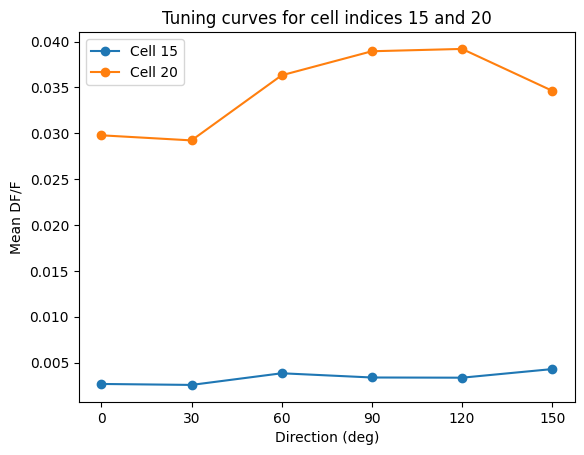

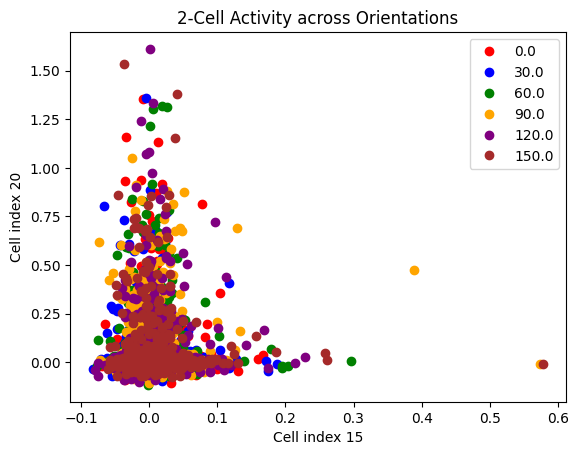

Training set shapes: (4500, 2) (4500,)
Test set shapes: (1500, 2) (1500,)
Percentage correct on training set:   0.16177777777777777
Percentage correct on testing set:    0.16533333333333333


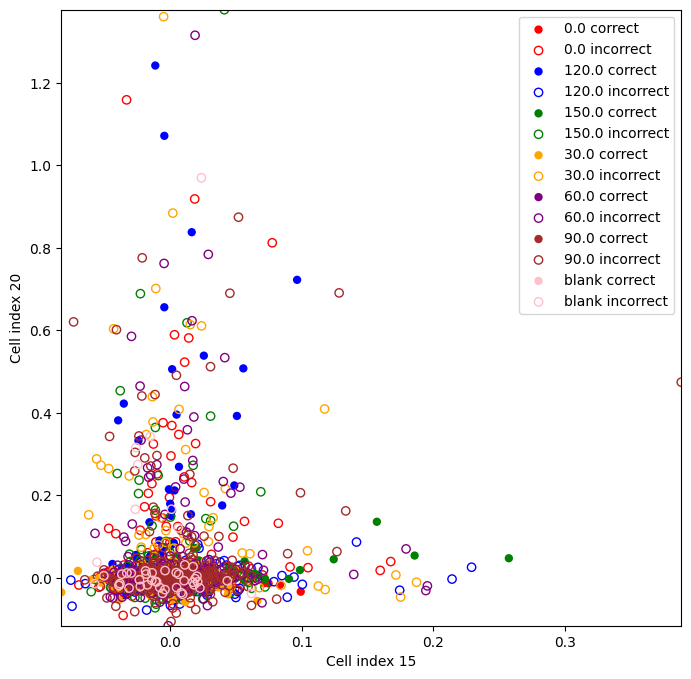

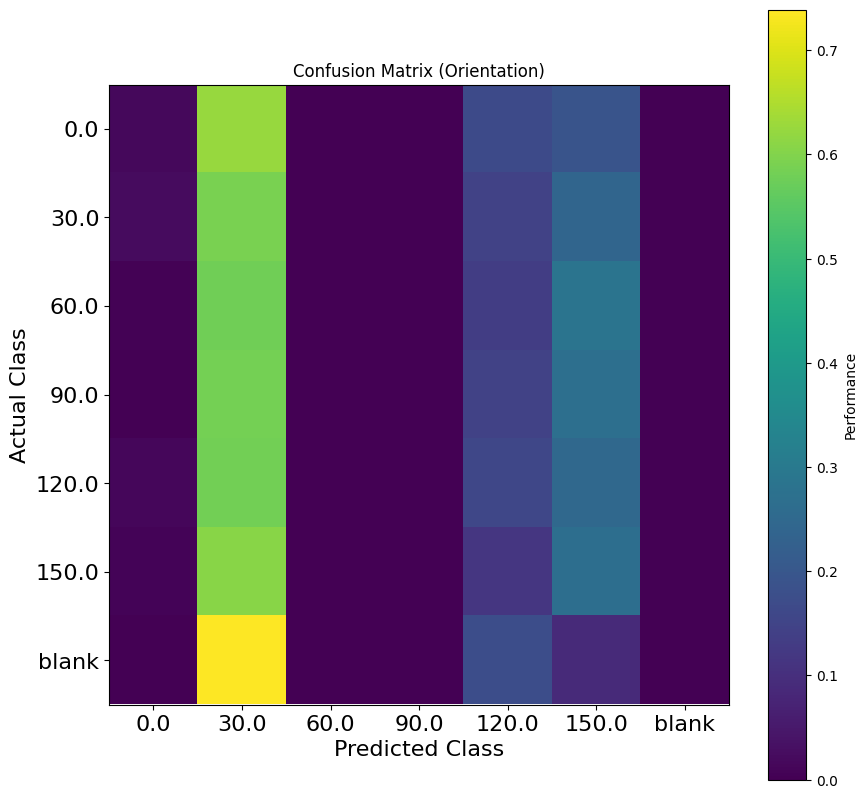

Weights shape: (7, 2)


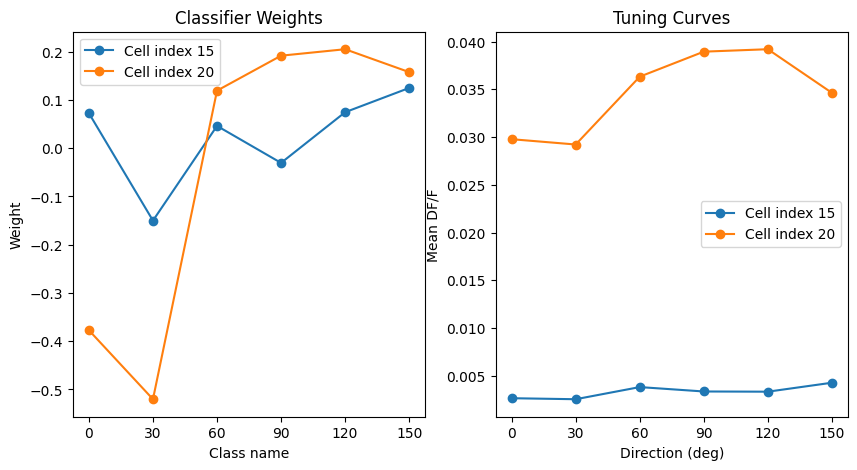

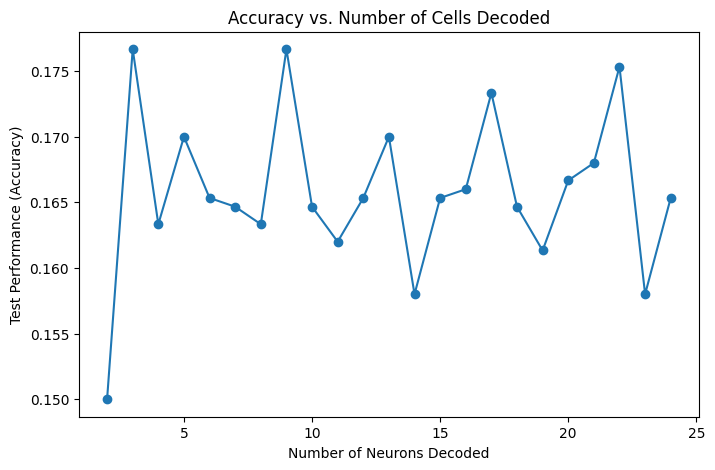

Offset -20: Test Accuracy = 0.16
Offset 0: Test Accuracy = 0.16
Offset 20: Test Accuracy = 0.18


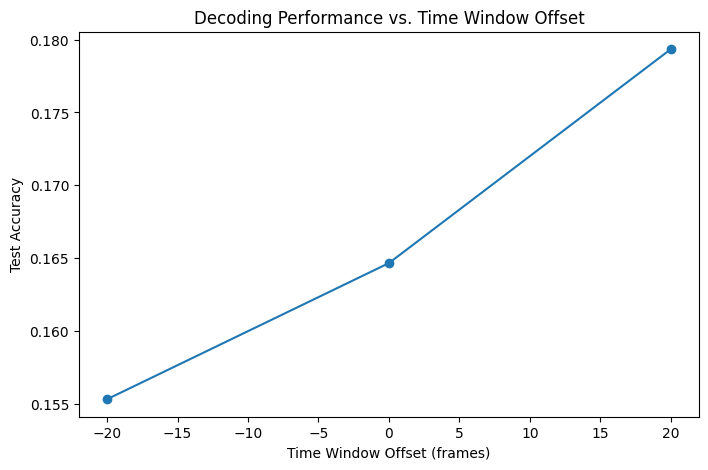

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# -----------------------------
# PREP
# -----------------------------
# defining missing parameters
num_neurons = dff.shape[0]            # number of neurons
num_trials = stim_table.shape[0]        # number of stimulus trials
cell_index = 15                        # randomly chose this cell
cell_index2 = 20                       # randomly chose this cell

# color list for plotting
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

# building stim arrays
activity = np.zeros([num_trials, num_neurons])
stim = []

for i, row in stim_table.iterrows():
    # get the mean dF/F for each neuron in the stim trial
    activity[i] = dff[:, int(row.start):int(row.end)].mean(axis=1)
    if np.isfinite(row.orientation):
        stim.append(str(row.orientation))
    else:
        stim.append('blank')

stim = np.array(stim)

# building orientation tuning curves
orientations = np.sort(stim_table.orientation.unique())
orientation_labels = [str(ori) for ori in orientations[:-1]] + ['blank']
num_orientations = len(orientations)
tuning_curves = np.zeros([num_neurons, num_orientations-1])

for i, ori in enumerate(orientations[:-1]):  # leave out NaNs
    mask = stim == str(ori)
    tuning_curves[:, i] = activity[mask, :].mean(axis=0)

# plotting tuning curves
plt.figure()
plt.plot(orientations[:-1], tuning_curves[cell_index], 'o-', label=f"Cell {cell_index}")
plt.plot(orientations[:-1], tuning_curves[cell_index2], 'o-', label=f"Cell {cell_index2}")
plt.xlabel("Direction (deg)")
plt.ylabel("Mean DF/F")
plt.xticks(orientations[:-1])
plt.title("Tuning curves for cell indices " + str(cell_index) + " and " + str(cell_index2))
plt.legend()
plt.show()

# plotting 2-cell activity across orientations
two_neuron_activity = activity[:, [cell_index, cell_index2]]

for i, ori in enumerate(orientations[:-1]):
    mask = stim == str(ori)
    plt.plot(two_neuron_activity[mask, 0], two_neuron_activity[mask, 1],
             'o', color=colors[i], label=ori)
    plt.legend()
plt.xlabel('Cell index ' + str(cell_index))
plt.ylabel('Cell index ' + str(cell_index2))
plt.title("2-Cell Activity across Orientations")
plt.show()

# temporal frequency does not show for static_gratings stimulus type
# static means unchanging patterns, so no concept of a frequency of movement

# -----------------------------
# NOW USING LOGISTIC REGRESSION
# -----------------------------
# splitting the data into training and test sets (using 75% for training)
test_index = int(0.75 * num_trials)
two_neuron_activity_train = two_neuron_activity[:test_index]
two_neuron_activity_test = two_neuron_activity[test_index:]
stim_train = stim[:test_index]
stim_test = stim[test_index:]

print("Training set shapes:", two_neuron_activity_train.shape, stim_train.shape)
print("Test set shapes:", two_neuron_activity_test.shape, stim_test.shape)

# Create and train the classifier
classifier = LogisticRegression(max_iter=1000)
classifier.fit(two_neuron_activity_train, stim_train)  # Use orientation labels

# predictions for the training and testing sets
stim_train_hat2 = classifier.predict(two_neuron_activity_train)
stim_test_hat2 = classifier.predict(two_neuron_activity_test)

# error (1 - percentage correct)
print("Percentage correct on training set:  ", np.mean(stim_train_hat2 == stim_train))
print("Percentage correct on testing set:   ", np.mean(stim_test_hat2 == stim_test))

def plot_test_performance(X, y, y_hat, xlabel=None, ylabel=None, names=None, ax=None):
    classes = np.unique(y)
    num_classes = len(classes)

    if ax is None:
        ax = plt.figure(figsize=(8, 8)).gca()

    for ii, cl in enumerate(classes):
        if names is not None:
            this_label = names[ii]
        else:
            this_label = f'{cl}'

        # determining correct vs. incorrect predictions
        is_class = (y == cl)
        is_correct = (y == y_hat)

        ax.scatter(X[is_class & is_correct, 0],
                   X[is_class & is_correct, 1],
                   c=colors[ii],
                   edgecolor='none',
                   label=this_label + ' correct')
        ax.scatter(X[is_class & ~is_correct, 0],
                   X[is_class & ~is_correct, 1],
                   c='none',
                   edgecolor=colors[ii],
                   label=this_label + ' incorrect')

    ax.set_xlim(X[:, 0].min(), X[:, 0].max())
    ax.set_ylim(X[:, 1].min(), X[:, 1].max())
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.show()
    return ax

# plot performance for orientation classification
plot_test_performance(two_neuron_activity_test, stim_test, stim_test_hat2,
                      xlabel='Cell index ' + str(cell_index),
                      ylabel='Cell index ' + str(cell_index2))

# -----------------------------
# CONFUSION MATRIX
# -----------------------------
# orientation classification
C = confusion_matrix(stim_test, stim_test_hat2, normalize='true', labels=orientation_labels)
num_classes = len(orientation_labels)

plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
cax = ax.imshow(C, interpolation='none', vmin=0, vmax=C.max())
ax.set_xlabel('Predicted Class', fontsize=16)
ax.set_ylabel('Actual Class', fontsize=16)
ax.set_xticks(range(num_classes))
ax.set_xticklabels(orientation_labels, fontsize=16)
ax.set_yticks(range(num_classes))
ax.set_yticklabels(orientation_labels, fontsize=16)
cbar = plt.colorbar(cax)
cbar.set_label('Performance')
plt.title("Confusion Matrix (Orientation)")
plt.show()

# plotting classifier weights vs. tuning curves
weights = classifier.coef_
print("Weights shape:", weights.shape)

classes_numeric = np.array([float(c) if c != 'blank' else np.nan for c in classifier.classes_])
class_index = np.argsort(classes_numeric)
classes_sorted = classes_numeric[class_index]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(classes_sorted[:-1], weights[class_index[:-1], 0], 'o-', label='Cell index ' + str(cell_index))
ax[0].plot(classes_sorted[:-1], weights[class_index[:-1], 1], 'o-', label='Cell index ' + str(cell_index2))
ax[0].set_xticks(classes_sorted[:-1])
ax[0].legend()
ax[0].set_ylabel('Weight')
ax[0].set_xlabel('Class name')
ax[0].set_title('Classifier Weights')

ax[1].plot(orientations[:-1], tuning_curves[cell_index], 'o-', label='Cell index ' + str(cell_index))
ax[1].plot(orientations[:-1], tuning_curves[cell_index2], 'o-', label='Cell index ' + str(cell_index2))
ax[1].legend()
ax[1].set_xlabel("Direction (deg)")
ax[1].set_ylabel("Mean DF/F")
ax[1].set_xticks(orientations[:-1])
ax[1].set_title('Tuning Curves')
plt.show()

# -----------------------------
# ACCURACY VS. NUMBER OF CELLS DECODED PLOT
# -----------------------------
# array for storing performance values for different numbers of neurons
performance = np.zeros(num_neurons - 2)

test_index = int(0.75 * num_trials)
stim_train_n = stim[:test_index]
stim_test_n = stim[test_index:]

for n in range(2, num_neurons):
    neuron_indices = np.random.permutation(np.arange(num_neurons))[:n]

    activity_train_n = activity[:test_index, neuron_indices]
    activity_test_n = activity[test_index:, neuron_indices]

    # create and train Logistic Regression classifier
    n_classifier = LogisticRegression(max_iter=1000)
    n_classifier.fit(activity_train_n, stim_train_n)

    # predict on the test set and compute accuracy
    stim_test_hat_n = n_classifier.predict(activity_test_n)
    performance[n - 2] = np.mean(stim_test_hat_n == stim_test_n)

# plot the accuracy vs. number of neurons decoded
plt.figure(figsize=(8, 5))
plt.plot(np.arange(2, num_neurons), performance, marker='o')
plt.xlabel('Number of Neurons Decoded')
plt.ylabel('Test Performance (Accuracy)')
plt.title('Accuracy vs. Number of Cells Decoded')
plt.show()


# -----------------------------
# EXERCISE 6:
# Compute the design matrix using a different time window or time offset relative to the stimulus.
# Redo the decoding and observe what happens as you move the window from before to after the stimulus.
# -----------------------------

# For this exercise, we try several offsets.
# (Negative offsets sample before stimulus onset; positive offsets sample after.)
offset_values = [-20, 0, 20]  # adjust these values as needed (e.g., measured in frames)

offset_performance = {}

for offset in offset_values:
    # Build a design matrix with a shifted time window.
    activity_offset = np.zeros([num_trials, num_neurons])
    stim_offset = []

    for i, row in stim_table.iterrows():
        new_start = int(row.start + offset)
        new_end = int(row.end + offset)

        # Check to ensure we don't go out of bounds
        if new_start < 0 or new_end > dff.shape[1]:
            # Fill with NaN if the window is invalid
            activity_offset[i] = np.nan
        else:
            activity_offset[i] = dff[:, new_start:new_end].mean(axis=1)

        if np.isfinite(row.orientation):
            stim_offset.append(str(row.orientation))
        else:
            stim_offset.append('blank')

    activity_offset = np.array(activity_offset)
    stim_offset = np.array(stim_offset)

    # Remove any trials with NaN values (invalid windows)
    valid_trials = ~np.isnan(activity_offset).any(axis=1)
    activity_offset = activity_offset[valid_trials]
    stim_offset = stim_offset[valid_trials]

    # Split into training and testing sets
    num_trials_offset = activity_offset.shape[0]
    test_index_offset = int(0.75 * num_trials_offset)
    activity_offset_train = activity_offset[:test_index_offset, :]
    activity_offset_test = activity_offset[test_index_offset:, :]
    stim_offset_train = stim_offset[:test_index_offset]
    stim_offset_test = stim_offset[test_index_offset:]

    # Train logistic regression on the shifted data
    offset_classifier = LogisticRegression(max_iter=1000)
    offset_classifier.fit(activity_offset_train, stim_offset_train)
    stim_offset_test_hat = offset_classifier.predict(activity_offset_test)
    accuracy = np.mean(stim_offset_test_hat == stim_offset_test)
    offset_performance[offset] = accuracy
    print(f"Offset {offset}: Test Accuracy = {accuracy:.2f}")

# Plot the decoding performance versus the offset
plt.figure(figsize=(8, 5))
offsets = list(offset_performance.keys())
accuracies = list(offset_performance.values())
plt.plot(offsets, accuracies, marker='o')
plt.xlabel('Time Window Offset (frames)')
plt.ylabel('Test Accuracy')
plt.title('Decoding Performance vs. Time Window Offset')
plt.show()


Originally, the fixed window of analysis was defined by row.start to row.end, but now I shifted this window by adding a constant offset of ±20 frames to both the start and end times. The negative offset shifts the window earlier, meaning the matrix captures primarily pre-stimulus activity. The positive offest shifts the window later and captures activity after the stimulus onset.

Results show that the accuracy outputs and the plot showing performance vs. time window offset shows that increasing the offset by 20 frames increases accuracy while decreasing the offset by 20 frames decreases accuracy, although both not by much.

One way to interpret this is that a -20 frame offset might capture the response too early and limit the available information from the stimulus. A +20 frame offset could align the window of analysis more optimally with the response, slightly improving the decoding performance accuracy.